# PCA applied to Titanic dataset

## Library Import

In [1]:
# some librarys
import numpy as np
import pandas as pd

## Collecting Data

In [2]:
# open database
df = pd.read_csv("titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrabling

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.drop("Cabin", axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
sex = pd.get_dummies(df["Sex"], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [7]:
embark = pd.get_dummies(df["Embarked"], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [8]:
Pclass = pd.get_dummies(df["Pclass"], drop_first=True)
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [9]:
df = pd.concat([df, sex, embark, Pclass], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [10]:
df.drop(["Sex", "Embarked", "PassengerId", "Name", "Ticket", "Pclass"], axis=1, inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Split features vectors and labels

In [11]:
X = df.drop("Survived", axis=1)
y = df["Survived"]
X.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [12]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Rescaling feature vector to all have the same scale

In [13]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [14]:
X_std

array([[-0.52766856,  0.52251079, -0.50678737, ...,  0.53403984,
        -0.56653751,  1.00281295],
       [ 0.57709388,  0.52251079, -0.50678737, ..., -1.87251946,
        -0.56653751, -0.99719495],
       [-0.25147795, -0.55271372, -0.50678737, ...,  0.53403984,
        -0.56653751,  1.00281295],
       ...,
       [-0.73481151, -0.55271372, -0.50678737, ...,  0.53403984,
        -0.56653751, -0.99719495],
       [-0.25147795, -0.55271372, -0.50678737, ..., -1.87251946,
        -0.56653751, -0.99719495],
       [ 0.16280796, -0.55271372, -0.50678737, ..., -1.87251946,
        -0.56653751,  1.00281295]])

## Covariance Matrix of features

In [15]:
features = X_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.00140647 -0.30778322 -0.18816076  0.09327352  0.09917652 -0.0217234
  -0.02546714  0.00922673 -0.31038021]
 [-0.30778322  1.00140647  0.38387668  0.1400572  -0.10644562  0.05140316
   0.01899424 -0.05264358  0.07716859]
 [-0.18816076  0.38387668  1.00140647  0.20691428 -0.2498937  -0.00942982
   0.01327725 -0.01858366  0.02778932]
 [ 0.09327352  0.1400572   0.20691428  1.00140647 -0.18271345 -0.06243393
  -0.25134748 -0.14044296 -0.40278453]
 [ 0.09917652 -0.10644562 -0.2498937  -0.18271345  1.00140647 -0.02729398
   0.10923139 -0.07545279  0.15866923]
 [-0.0217234   0.05140316 -0.00942982 -0.06243393 -0.02729398  1.00140647
  -0.37939159 -0.08104234  0.14529129]
 [-0.02546714  0.01899424  0.01327725 -0.25134748  0.10923139 -0.37939159
   1.00140647  0.16881438  0.09327123]
 [ 0.00922673 -0.05264358 -0.01858366 -0.14044296 -0.07545279 -0.08104234
   0.16881438  1.00140647 -0.56574292]
 [-0.31038021  0.07716859  0.02778932 -0.40278453  0.15866923  0.14529129
   0.09327123 -0.565742

## Eigen Vectors and Eigen Values from Covariance Matrix

In [16]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [17]:
print("Eigenvector \n{}".format(eig_vecs))

Eigenvector 
[[-0.42549744  0.1394993   0.28667546 -0.20079376 -0.29547624  0.24164493
  -0.2210482  -0.69424943 -0.02116256]
 [ 0.32524147 -0.39675153 -0.2396664  -0.02254068  0.02048875  0.2988928
  -0.59593585 -0.07186357 -0.47832787]
 [ 0.22326197 -0.477692   -0.23241727  0.08288772 -0.08232349  0.04728662
   0.63216684 -0.501769   -0.0256136 ]
 [-0.1700155  -0.4941996   0.22598462 -0.38691513 -0.46420169 -0.4776237
  -0.01195451  0.24956426 -0.14162019]
 [ 0.02503839  0.43948292  0.03331133  0.03222906 -0.18180031 -0.03141219
   0.32798115  0.06414191 -0.81139114]
 [ 0.20963984 -0.05289622  0.48646434  0.08451545  0.54614063 -0.50929061
  -0.10808559 -0.33274866 -0.17149939]
 [-0.0388967   0.24129342 -0.63214676  0.10294309 -0.17567924 -0.60037716
  -0.24501548 -0.27617463  0.04936388]
 [-0.45165025 -0.07397492 -0.34316696 -0.55505412  0.56586743  0.02815336
   0.12658996  0.01448673 -0.1657036 ]
 [ 0.61995326  0.30177347  0.01265212 -0.6897363  -0.08731299  0.01736119
   0.030143

In [18]:
print("\nEigenValues \n{}".format(eig_vals))


EigenValues 
[1.83722751 1.79097298 1.49087017 0.18987533 1.09350437 0.47446778
 0.56583156 0.73145821 0.83845033]


In [19]:
''' We reduce dimension to 1 dimension, since 1
eigenvector has 20% (enough) variances '''

eig_vals[0] / sum(eig_vals)

0.20384968135225123

## Project Data Point onto selected Eigen Vector

In [20]:
projected_X = X_std.dot(eig_vecs.T[0])
projected_X

array([ 1.20242856e+00, -6.71786411e-01,  6.80987243e-01, -6.18817059e-01,
        4.68215118e-01, -1.47071396e+00,  2.70656385e+00,  1.16441494e+00,
       -8.87315039e-01,  1.91040390e+00, -1.55892866e+00,  9.08909110e-01,
        1.93355892e+00,  1.03376998e+00, -2.48997248e+00,  4.20257352e+00,
        8.51417660e-01, -1.88247264e+00, -1.81131345e+00,  2.17600123e+00,
       -6.54258322e-01,  2.47824026e+00,  1.91053097e+00,  4.51256151e-01,
       -8.88205399e-01, -2.74342609e+00, -3.60934830e-01, -7.68893062e-01,
        8.79529511e-01,  1.58306005e+00,  1.46619798e+00,  6.14399037e-01,
       -1.33370517e+00, -7.80071301e-02,  2.05896491e+00,  1.23399522e+00,
        2.84955632e+00,  8.80332964e-01, -1.01246412e+00, -1.40853344e+00,
       -1.47123645e+00, -1.47339011e+00,  7.55427622e-01, -1.85929047e-01,
        3.32012498e+00,  9.46395019e-01, -9.58186687e-01,  2.88742946e+00,
       -1.70842691e+00,  9.37940653e-01,  2.86735222e+00,  1.43007825e+00,
       -1.74451971e+00,  

In [22]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = y

In [23]:
result.head()

,PC1,y-axis,label
0,1.202429,0.0,0.0
1,-0.671786,0.0,1.0
2,0.680987,0.0,1.0
3,-0.618817,0.0,1.0
4,0.468215,0.0,0.0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'PCA Applied To Titanic Dataset')

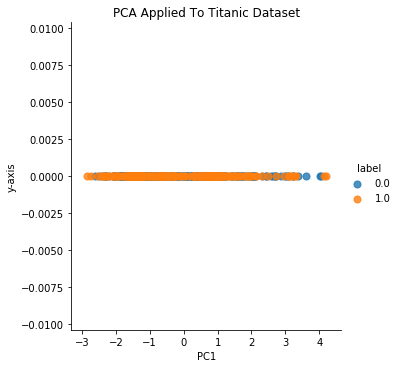

In [26]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False, 
           scatter_kws={"s":50}, hue="label")
# set title
plt.title("PCA Applied To Titanic Dataset")

## Using PCA of Sklearn

In [27]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA()
# This is where we do all of the PCA math(i.e 
# calculate loading scores and the variation
# each PC accounts for)
pca.fit(X_std)
# Generate coordinates for a PCA graph based on the
# loading scores and the scaled data
pca_data = pca.transform(X_std)
pca_data

array([[ 1.20242856, -1.03277067, -0.47912886, ..., -0.41141451,
        -0.0114627 ,  0.06300828],
       [-0.67178641,  1.50907444,  1.53786887, ..., -0.82249007,
        -1.17571042, -0.3115767 ],
       [ 0.68098724, -0.57805984, -0.20861567, ..., -0.5136111 ,
         0.18397347,  0.16615908],
       ...,
       [-0.42421194,  0.29913639, -0.27817982, ..., -0.47204612,
         0.53479644, -1.14891533],
       [-0.48421593, -0.10113179,  1.45092125, ...,  0.69251559,
        -0.96154699, -0.87111918],
       [ 1.72949134, -0.69818752,  4.00273083, ...,  0.11016858,
         1.32296011, -0.00600855]])

### Calculate the percentage of variation that each PC

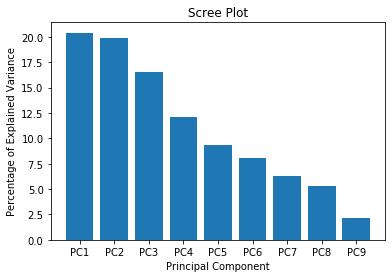

In [31]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

### To draw a PCA Plot

In [34]:
# first put the new coordinates into a nice matrix where the rows
# have sample labels and the columns have PC labels.
pca_df = pd.DataFrame(pca_data, index=[X.index], columns=labels)

Text(-0.6717864110378873, -0.6981875170379409, '(1,)')

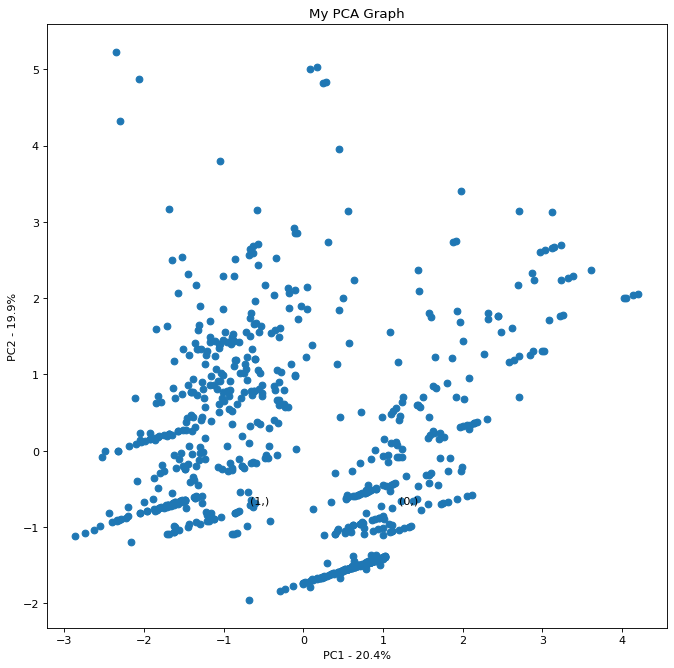

In [50]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("My PCA Graph")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

# This loop adds sample names to the Graph
# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.annotate(pca_df.index[0], (pca_df.PC1.loc[pca_df.index[0]], pca_df.PC2.loc[sample]))
plt.annotate(pca_df.index[1], (pca_df.PC1.loc[pca_df.index[1]], pca_df.PC2.loc[sample]))
                